# Intro Discussion

- What is our goal when creating a prediction model?
- How do we measure that goal?
- Are thre cases when our measurement of that goal conflicts with creating our model?
- How does model complexity relate to all of this?

# Recalling Training vs Testing

## Example dataset

### The full dataset

![](https://github.com/learn-co-students/dsc-2-24-07-bias-variance-trade-off-online-ds-sp-000/raw/master/index_files/index_7_1.png)

### Linear regression on the train & test sets

![](https://github.com/learn-co-students/dsc-2-24-07-bias-variance-trade-off-online-ds-sp-000/raw/master/index_files/index_11_0.png)

## Let's fit it with some fancy polynomial!

![](https://github.com/learn-co-students/dsc-2-24-07-bias-variance-trade-off-online-ds-sp-000/raw/master/index_files/index_14_0.png)

Did we succeed?!

## Less fancy polynomial

![](images/parabola_fit.png)

# Trading Variance & Bias

We need to worry about **underfitting** *and* **overfitting**

$ MSE = Bias(\hat{y})^2 + Var(\hat{y}) + \sigma^2$

![](images/bias_variance_bullseye.png)

## Bias

When you're *off* from the bullseye

> Model: *I don't need to look; I know what to do without help*

- When would this occur?
<!-- 
    * Wrong assumptions == model didn't catch all the use cases 
-->

### Solution?

Need to consider more evidence (more complex model)

## Variance

When you have bigger changes from each throw

> Model: *Well, a last time the target was slightly red and therefore need to adjust to the right by 2.3cm*

- When would this occur?
<!-- 
    * Random noise leads to setting in the training on a sensitive model
-->

### Solution?

Relax the model; it's too uptight (simpler model)

## Overfitting & Underfitting

Which fits with what (bias & variance)?

![From https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229](https://cdn-images-1.medium.com/max/1600/1*RQ6ICt_FBSx6mkAsGVwx8g.png)

> From: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

# Evaluation Metrics For Classification

How do we measure how good our classification?

## Precision & Recall

An inverse relationship

<img src='images/precisionrecall.png'/>

### Precision

$$ Precision = \frac{True\ Pos}{All\ Selected\ Pos}$$

### Recall

$$ Recall = \frac{True\ Pos}{All\ Pos}$$

### Comparing

High Recall: "Everyone is positive!!!"

High Percision: "Don't want to make guess; only if near 100% certain!"

## Accuracy

$$ Accuracy = \frac{True\ Pos + True\ Neg}{All\ Observations}$$

## $F_1$ Score

Harmonic mean: punishes extreme values

$$F_1 = \frac{2 \cdot Precision \cdot Recall}{Precision + Recall}$$

## $F_\beta$ Score

As $\beta$ increases, **recall** is more important

$$F_\beta =  \frac{(1+\beta^2) \cdot Precision \cdot Recall}{\beta^2 \cdot Precision + Recall}$$

# Confusion Matrix

- Type 1 Errors: False Positive
- Type 2 Errors: False Negative

<img src='images/precisionrecall.png'/>

Confusion matrix:
- diagonals are true positives
- y-axis (usually the true label)
    + False negatives when read horizontal
    + False positives when read vertically

## Examples

### Simple

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-3-27-06-confusion-matrices-online-ds-sp-000/master/index_files/index_7_0.png'/>

### Multiple Classes

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-3-27-06-confusion-matrices-online-ds-sp-000/master/index_files/index_9_0.png' />

### American Sign Language Classification Example

https://github.com/MrGeislinger/ASLTransalation

<img src='images/vgg16_confusionMatrix.png' />

<img src='https://raw.githubusercontent.com/MrGeislinger/ASLTransalation/master/fingerspelling/paper/images/resnet50_confusionMatrix.png?token=ACE4BRYOSBINDWBWH3UOJDK43V3EO' />

We have to consider how well we can just "guess" a classifier

Compare False Positive rate vs True Positive rate!

# ROC Curve - Receiver Operating Characteristic Curve

## What's our "worst" kind of classifier?

(Just guessing)

Note a bad classifier who always guesses wrong is an **amazing** classifier! 
> (Do the opposite of the person who hates all of your movies you love)

## Evaluating Our Model

### Looking at Just the Logistic Regression

Imagine we have a logistic regression (classifier):
 - Turn a continuous feature to binary prediction

[**What's the threshold?**](app.ziteboard.com)

### What Distributions Would Work Well in Classifying?

![](images/roc_crossover.png)

### Defining the Threshold

![](images/auc_rates.png)

## Graph Interpretation

False Positive Rate vs True Positive Rate → for each threshold

![](images/roc_comparison.png)

In [1]:
# Interactive ROC curve
from IPython.display import IFrame
IFrame('http://www.navan.name/roc/', width=900, height=600)

## Code Example

In [2]:
# Based on code from: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from scipy import interp

In [3]:
# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = datasets.load_iris(return_X_y=True)

# Shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = LogisticRegression(fit_intercept = False, C = 1e12, solver='lbfgs', multi_class='multinomial')
y_score = classifier.fit(X_train, y_train).decision_function(X_test)


# Binarize the output
y_test = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test.shape[1]

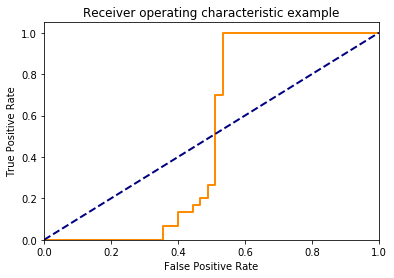

In [4]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])



plt.figure()
lw = 2
class_pt = 1
plt.plot(fpr[class_pt], tpr[class_pt], color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.show()

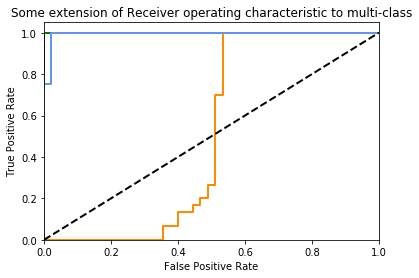

In [5]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

# Plot all ROC curves
plt.figure()


colors = cycle(['green', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.show()


How do we quantify this; what is a better classification model?

# AUC - Area Under the Curve

A way for us to compare models' performances

## Example of ROC Curve & AUC

In [1]:
# Based on code from: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresholds = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(thresholds)
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

[ 1.37991331  0.37991331  0.24966175  0.19599366  0.18869727  0.17642852
  0.12163662  0.12127427  0.11801481  0.06910059 -0.01116192 -0.02392675
 -0.03259341 -0.04953425 -0.06196433 -0.07856729 -0.11107635 -0.1906155
 -0.19299299 -0.23036784 -0.25045747 -1.11907501]
[ 1.18264917  0.18264917 -0.04226738 -0.06436533 -0.08425378 -0.13384038
 -0.13784913 -0.21918849 -0.24059516 -0.24506467 -0.2653183  -0.2863326
 -0.29572764 -0.30270719 -0.31125083 -0.36698232 -0.39894364 -0.43228203
 -0.46354017 -0.47617037 -0.48759987 -0.5611945  -0.56572577 -0.60044961
 -0.62483455 -0.62804881 -0.63144366 -0.63705856 -0.70826295 -0.71470221
 -0.73611276 -0.7579771  -0.78971942 -0.83392076 -0.84787471 -1.0107504 ]
[ 1.58423201  0.58423201  0.21326435  0.12967625  0.04838688  0.02530178
  0.02199789  0.02046723  0.00856393  0.00767521 -0.01186087 -0.05831557
 -0.07455313 -0.10238744 -0.10551977 -0.11058011 -0.12051204 -0.2039252
 -0.21662877 -0.21682409 -0.22759345 -0.2292247  -0.23302033 -0.27802284
 -0

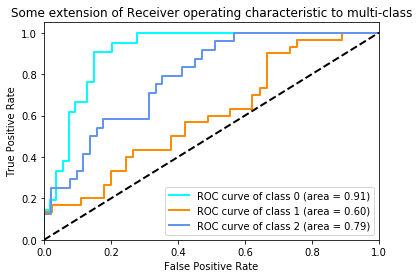

In [3]:
# Plot all ROC curves
lw=2
plt.figure()

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()